In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.patches as mpatches
import unicodedata, re
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

sns.set(style="whitegrid", font_scale=1.1)

In [2]:
# Loading data
df1 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name="ESPECES")
df2 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name="GPS-MILIEU")
df3 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name="NOM FRANÇAIS")

In [3]:
df_species = df1.copy()
df_sites = df2.copy()
df_observations = df3.copy()

In [4]:
print(df_species.info())
df_species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Unnamed: 1        0 non-null      float64
 2   Aigrette bleue    86 non-null     object 
 3   Egretta caerulea  86 non-null     object 
 4   Migrateur         86 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.5+ KB
None


,Unnamed: 0,Unnamed: 1,Aigrette bleue,Egretta caerulea,Migrateur
0,NaN,NaN,Aigrette garzette,Egretta garzetta,Migrateur
1,NaN,NaN,Aigrette neigeuse,Egretta thula,Migrateur
2,NaN,NaN,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
3,NaN,NaN,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme
4,NaN,NaN,Astrild à joues orange,Estrilda melpoda,Exogène introduit par l’homme


In [5]:
print(df_sites.info())
df_sites.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   Unnamed: 1    0 non-null      float64
 2   Unnamed: 2    651 non-null    object 
 3   WGS84 UTM 20  651 non-null    object 
 4   Unnamed: 4    651 non-null    object 
 5   Unnamed: 5    650 non-null    object 
 6   Unnamed: 6    650 non-null    object 
 7   Unnamed: 7    650 non-null    object 
dtypes: float64(2), object(6)
memory usage: 40.8+ KB
None


,Unnamed: 0,Unnamed: 1,Unnamed: 2,WGS84 UTM 20,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,Transect,X,Y,NaN,NaN,NaN
1,NaN,NaN,Aéroport,714593,1614233,Mangrove,S1,SIPI
2,NaN,NaN,Aéroport,714416,1614194,Mangrove,S1,S1P2
3,NaN,NaN,Aéroport,714133,1614141,Mangrove,S1,S1P3
4,NaN,NaN,Aéroport,713914,1614103,Mangrove,S1,S1P4


In [6]:
print(df_observations.info())
df_observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114497 entries, 0 to 114496
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Nom observateur        114495 non-null  object 
 1   code département       114493 non-null  float64
 2   Nom transect           114495 non-null  object 
 3   date                   114495 non-null  object 
 4   1er, 2e ou 3e passage  114495 non-null  float64
 5   nuages                 114494 non-null  object 
 6   pluie                  114494 non-null  float64
 7   vent                   114478 non-null  float64
 8   visibilité             114494 non-null  float64
 9   N° point               114495 non-null  float64
 10  heure début            114495 non-null  object 
 11  ESPECE                 114495 non-null  object 
 12  distances de contact   58833 non-null   object 
 13  Unnamed: 13            39192 non-null   object 
 14  Unnamed: 14            31150 non-nul

,Nom observateur,code département,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,totaux,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<100m,NaN,> 100m,NaN,vol,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Auditif,Visuel,Auditif,Visuel,NaN,Auditif,"Visuel (sans""Vol"")","A+V (sans ""Vol"")","A+V (avec ""Vol"")",NaN
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1,0,1,1,NaN
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,2,2,2,NaN


In [7]:
# Removing empty columns of species
del df_species["Unnamed: 0"]
del df_species["Unnamed: 1"]

# Renaming the columns names of species
df_species.columns = ["French Name", "Latin Name", "Origin"]
df_species.loc[len(df_species)] = ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']

# Removing empty columns of sites
del df_sites["Unnamed: 0"]
del df_sites["Unnamed: 1"]

# Removing the first line containing the names of the columns of sites
df_sites.drop(0, inplace = True) 

# Renaming the columns names of sites
df_sites.columns = ["Transect", "X","Y","Type","Site","Site+Point"]

# Check Site+Point format: starts with S, then digits, then P, then digits
pattern = re.compile(r"^S\d+P\d+$")
valid_format = df_sites["Site+Point"].apply(lambda x: bool(pattern.match(str(x))))
invalid_sites = df_sites[~valid_format]
print(f"Total rows: {len(df_sites)}")
print(f"Rows with invalid format: {len(invalid_sites)}")

if not invalid_sites.empty:
    print("Values not matching the format:")
    display(invalid_sites[["Site+Point"]])
else:
    print("All values in column 'Site+Point' follow the format S<number>P<number>")

# Correction for the unique invalid entry found
df_sites.loc[1, "Site+Point"] = "S1P1"
print(df_sites.loc[1, "Site+Point"])

# Removing the name and the department code for the observations
del df_observations["code département"]
df_observations.drop(0, inplace = True) 
df_observations.drop(1, inplace = True) 

# Cleaning and converting the last two columns to integers
def clean_to_int(series):
    """
    Convert a mixed-type pandas Series to integer
    
    - Non-numeric values -> NaN
    - Floats -> rounded to nearest integer
    """
    return pd.to_numeric(series, errors='coerce').round().astype('Int64').clip(lower=0)

df_observations.iloc[:,-2] = clean_to_int(df_observations.iloc[:,-2])
df_observations.iloc[:,-3] = clean_to_int(df_observations.iloc[:,-3])

# Compute number of observed birds per observation
df_observations["Amount"] = df_observations.iloc[:,-2] + df_observations.iloc[:,-3] 

# Rename the last four columns of observations
cols_to_rename = df_observations.columns[-6:-2]
new_names = ["Auditif", "Visuel", "A+V", "A+V Vol"]

# Renaming the columns of observations
rename_dict = dict(zip(cols_to_rename, new_names))
df_observations = df_observations.rename(columns=rename_dict)

# Cleaning "nuages", "rain", "wind" and "visibility" columns
def cast_as_float(x):
    """
    Convert an str value to float, treating " " and NaN as np.nan
    Convert any value that is < 1.0 to 1.0 and any value that is > 3.0 to 3.0
    """
    if x == " " or pd.isna(x):
        return np.nan
    else:
        val = float(x)
        if val < 1.0:
            return 1.0
        elif val > 3.0:
            return 3.0
        else:
            return val
    
df_observations["nuages"] = df_observations["nuages"].apply(cast_as_float)
df_observations["pluie"] = df_observations["pluie"].apply(cast_as_float)
df_observations["vent"] = df_observations["vent"].apply(cast_as_float)
df_observations["visibilité"] = df_observations["visibilité"].apply(cast_as_float)

# Extracting year from date
df_observations['date'] = pd.to_datetime(df_observations['date'])
df_observations['year'] = df_observations['date'].dt.year

# Cleaning and converting the last four columns to integers
df_observations["Auditif"] = clean_to_int(df_observations["Auditif"])
df_observations["Visuel"] = clean_to_int(df_observations["Visuel"])
df_observations["A+V"] = clean_to_int(df_observations["A+V"])
df_observations["A+V Vol"] = clean_to_int(df_observations["A+V Vol"])

# Normalizing strings for merging
def normalize_str(s):
    if pd.isna(s):
        return s
    s = str(s)
    s = s.strip()  # remove leading/trailing spaces
    s = " ".join(s.split())  # normalize internal spacing
    s = s.lower()  # lowercase
    s = unicodedata.normalize("NFKC", s)  # normalize unicode accents
    return s

df_species["clean_name"] = df_species["French Name"].apply(normalize_str)
df_observations["clean_espece"] = df_observations["ESPECE"].apply(normalize_str)
df_observations["Nom transect"] = df_observations["Nom transect"].apply(normalize_str)
df_sites["Transect"] = df_sites["Transect"].apply(normalize_str)

# Fixing known inconsistency in transect names
df_observations["Nom transect"] = df_observations["Nom transect"].replace("desmarinière", "desmarinières")

Total rows: 650
Rows with invalid format: 1
Values not matching the format:


,Site+Point
1,SIPI


S1P1


In [8]:
# Checking species in observations not in species list
not_in_species = df_observations.loc[~df_observations["clean_espece"].isin(df_species["clean_name"]), "ESPECE"].unique()
print(not_in_species)
count = 0
for val in df_observations["ESPECE"]:
    if val in not_in_species:
        count += 1
print(count)

['Trochilidae' 'Columbidae' 'Estrildidae' 'RAS' 'Limicole' 'Hirundinidae'
 'Apodidae' 'Fauconidae' 'Sterne sp' 'Mimidae ' 'Moqueur  sp.'
 'Lonchura sp.' 'Bécasseau semipalmé' 'trochilidae' 'Anatidae' 'Martinet'
 'Egretta sp.' 'Capucin sp' 'Gallinacées' 'Falconidé' 'Héron ?']
1210


In [9]:
# Mapping of unknown species groups to possible species
unknown_species_mapping = {
    "trochilidae": [
        "colibri à tête bleue",
        "colibri falle-vert",
        "colibri huppé",
        "colibri madère"
    ],
    "columbidae": [
        "colombe à croissant",
        "colombe à queue noire",
        "colombe rouviolette",
        "tourterelle à queue carrée",
        "tourterelle oreillarde",
        "tourterelle turque",
        "pigeon biset domestique",
        "pigeon à cou rouge"
    ],
    "estrildidae": [
        "astrild à joues orange",
        "astrild cendré",
        "astrild ondulé"
    ],
    "ras": [],
    "limicole": [
        "bécasseau minuscule",
        "gravelot semipalmé",
        "tournepierre à collier",
        "huîtrier d’amérique"
    ],
    "hirundinidae": [
        "hirondelle rustique",
        "hirondelle de rivage",
        "hirondelle à ventre blanc"
    ],
    "apodidae": [
        "martinet chiquesol",
        "martinet sombre"
    ],
    "fauconidae": [
        "faucon émerillon",
        "faucon pèlerin",
        "crécerelle d’amérique"
    ],
    "falconidé": [
        "faucon émerillon",
        "faucon pèlerin",
        "crécerelle d’amérique"
    ],
    "sterne sp": [
        "sterne bridée",
        "sterne de dougall",
        "sterne fuligineuse",
        "sterne royale"
    ],
    "mimidae": [
        "moqueur corossol",
        "moqueur des savanes",
        "moqueur gorge blanche",
        "moqueur grivotte"
    ],
    "moqueur sp.": [
        "moqueur corossol",
        "moqueur des savanes",
        "moqueur gorge blanche",
        "moqueur grivotte"
    ],
    "lonchura sp.": [
        "capucin à tête blanche",
        "capucin à tête noire"
    ],
    "bécasseau semipalmé": [
        "gravelot semipalmé"
    ],
    "anatidae": [
        "canard musqué"
    ],
    "martinet": [
        "martinet chiquesol",
        "martinet sombre"
    ],
    "capucin sp": [
        "capucin à tête blanche",
        "capucin à tête noire"
    ],
    "egretta sp.": [
        "aigrette bleue",
        "aigrette garzette",
        "aigrette neigeuse",
        "aigrette tricolore"
    ],
    "gallinacées": [
        "coq bankiva"
    ],
    "héron ?": [
        "bihoreau gris",
        "bihoreau violacé",
        "héron garde-bœuf",
        "héron vert",
        "grande héron"
    ]
}

# Computing species probabilities for unknown groups
def compute_species_probabilities(df_observations, unknown_species_mapping):
    """
    Compute probabilities of species within each unknown species group based on observations made
    """
    probabilities = {}

    for group, species_list in unknown_species_mapping.items():
        if not species_list:
            continue 

        # Filter observations to only those in the current species list
        mask = df_observations["clean_espece"].isin(species_list)
        subset = df_observations[mask]

        # Uniform fallback if no observations for this group
        if subset.empty:
            n = len(species_list)
            probabilities[group] = {sp: 1/n for sp in species_list}
            continue

        # Count the total number of individuals observed per species
        counts = (subset.groupby("clean_espece")["Amount"].sum().reindex(species_list, fill_value=0))

        # Normalize to get probabilities
        total = counts.sum()
        # Uniform fallback if all values are null
        if total == 0:
            probs = {sp: 1/len(species_list) for sp in species_list}
        else:
            probs = (counts / total).to_dict()

        probabilities[group] = probs

    return probabilities
    
# Compute and display species probabilities for unknown groups
species_probabilities = compute_species_probabilities(df_observations, unknown_species_mapping)
for group, probs in species_probabilities.items():
    print(f"{group} → {probs}")

# Assigning species to unknown groups based on computed probabilities
def assign_unknown_species(row, species_probabilities):
    """
    Assign a specific species to an observation if its species is in an unknown group
    """
    group = row["clean_espece"]

    if group in species_probabilities:
        probs = species_probabilities[group]
        species = list(probs.keys())
        probabilities = np.array(list(probs.values()), dtype=float)
        probabilities = probabilities / probabilities.sum()
        assigned_species = np.random.choice(species, p=probabilities)
        return assigned_species
    else:
        return group

df_observations["clean_espece"] = df_observations.apply(assign_unknown_species, axis=1, species_probabilities=species_probabilities)

# Check cleaning
not_in_species = df_observations.loc[~df_observations["clean_espece"].isin(df_species["clean_name"]), "ESPECE"].unique()
print(not_in_species)
count = 0
for val in df_observations["ESPECE"]:
    if val in not_in_species:
        count += 1
print(count)

trochilidae → {'colibri à tête bleue': 0.006390683803166939, 'colibri falle-vert': 0.11638145281545126, 'colibri huppé': 0.5159412057090109, 'colibri madère': 0.36128665767237095}
columbidae → {'colombe à croissant': 6.34226006437394e-05, 'colombe à queue noire': 0.07396660800076107, 'colombe rouviolette': 0.026986316573911113, 'tourterelle à queue carrée': 0.6443419112400705, 'tourterelle oreillarde': 6.34226006437394e-05, 'tourterelle turque': 0.10911858440755363, 'pigeon biset domestique': 0.14520604417384134, 'pigeon à cou rouge': 0.0002536904025749576}
estrildidae → {'astrild à joues orange': 0.04615209730589974, 'astrild cendré': 0.020461520973059, 'astrild ondulé': 0.9333863817210413}
limicole → {'bécasseau minuscule': 0.10211267605633803, 'gravelot semipalmé': 0.38380281690140844, 'tournepierre à collier': 0.5140845070422535, 'huîtrier d’amérique': 0.0}
hirundinidae → {'hirondelle rustique': 0.23823286540049546, 'hirondelle de rivage': 0.0, 'hirondelle à ventre blanc': 0.761767

In [10]:
df_species.head()

,French Name,Latin Name,Origin,clean_name
0,Aigrette garzette,Egretta garzetta,Migrateur,aigrette garzette
1,Aigrette neigeuse,Egretta thula,Migrateur,aigrette neigeuse
2,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur,aigrette tricolore
3,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme,amazone aourou
4,Astrild à joues orange,Estrilda melpoda,Exogène introduit par l’homme,astrild à joues orange


In [11]:
df_sites.head()

,Transect,X,Y,Type,Site,Site+Point
1,aéroport,714593,1614233,Mangrove,S1,S1P1
2,aéroport,714416,1614194,Mangrove,S1,S1P2
3,aéroport,714133,1614141,Mangrove,S1,S1P3
4,aéroport,713914,1614103,Mangrove,S1,S1P4
5,aéroport,713719,1614062,Mangrove,S1,S1P5


In [12]:
df_observations.head()

,Nom observateur,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,heure début,...,Unnamed: 19,Unnamed: 20,Auditif,Visuel,A+V,A+V Vol,Unnamed: 25,Amount,year,clean_espece
2,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,sucrier à ventre jaune
3,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,1,1,1,NaN,2,2014,sporophile cici
4,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,2,2,2,NaN,4,2014,colibri falle-vert
5,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,elénie siffleuse
6,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,coulicou manioc


In [13]:
# Describing the tables dimensions
def describe(df, df_name):
    print("Description of ",df_name)
    nLines, nColums = df.shape
    print("Number of lines :",nLines)
    print("Number of columns :",nColums)
    print("Columns names :  ", " - ".join(df.keys()))
    print("")

describe(df_species, "df_species")
describe(df_sites, "df_sites")
describe(df_observations, "df_observations")

Description of  df_species
Number of lines : 87
Number of columns : 4
Columns names :   French Name - Latin Name - Origin - clean_name

Description of  df_sites
Number of lines : 650
Number of columns : 6
Columns names :   Transect - X - Y - Type - Site - Site+Point

Description of  df_observations
Number of lines : 114495
Number of columns : 28
Columns names :   Nom observateur - Nom transect - date - 1er, 2e ou 3e passage - nuages - pluie - vent - visibilité - N° point - heure début - ESPECE - distances de contact - Unnamed: 13 - Unnamed: 14 - Unnamed: 15 - Unnamed: 16 - Unnamed: 17 - Unnamed: 18 - Unnamed: 19 - Unnamed: 20 - Auditif - Visuel - A+V - A+V Vol - Unnamed: 25 - Amount - year - clean_espece



In [14]:
# Describing
print(f"There are {len(df_sites["Transect"].unique())} differents transects")
print(f"There are {len(df_sites["Type"].unique())} differents types of transects (habitats)")
print(f"There are {len(df_species)} differents species")

# Check each transect has 10 points
numberPoints = {i: 0 for i in df_sites["Transect"].unique()}
for val in df_sites["Transect"]:
    numberPoints[val] += 1

flag = True
for transect in numberPoints:
    if numberPoints[transect] != 10:
        print(f"Transect {transect} has {numberPoints[transect]} points")
        flag = False

if flag :
    print("Every transect has 10 points")
else:
    print("Some transects do not have 10 points")

There are 65 differents transects
There are 7 differents types of transects (habitats)
There are 87 differents species
Every transect has 10 points


In [15]:
df_species.to_csv("data/processed/species.csv")
df_sites.to_csv("data/processed/sites.csv")
df_observations.to_csv("data/processed/observations.csv")

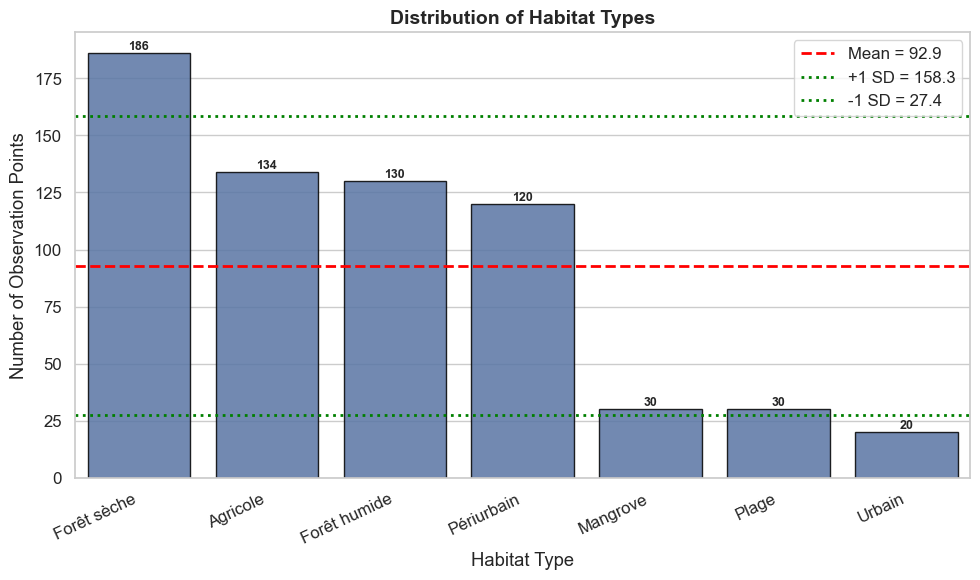

In [16]:
# Count number of transects per type
type_counts = (df_sites["Type"].value_counts().reset_index())
mean = type_counts["count"].mean()
std = type_counts["count"].std()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=type_counts, x="Type", y="count", alpha=0.85, edgecolor="black")
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
plt.axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.1f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.1f}')

# Add labels on bars
for i, val in enumerate(type_counts["count"]):
    ax.text(i, val + 0.3, f"{val}", ha="center", va="bottom", fontsize=9, fontweight="bold")

# Titles and labels
ax.set_title("Distribution of Habitat Types", fontsize=14, fontweight="bold")
ax.set_xlabel("Habitat Type")
ax.set_ylabel("Number of Observation Points")
plt.legend(loc="upper right", frameon=True)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.savefig("figures/habitat_types_distribution.jpeg", bbox_inches="tight", dpi=300)
plt.show()

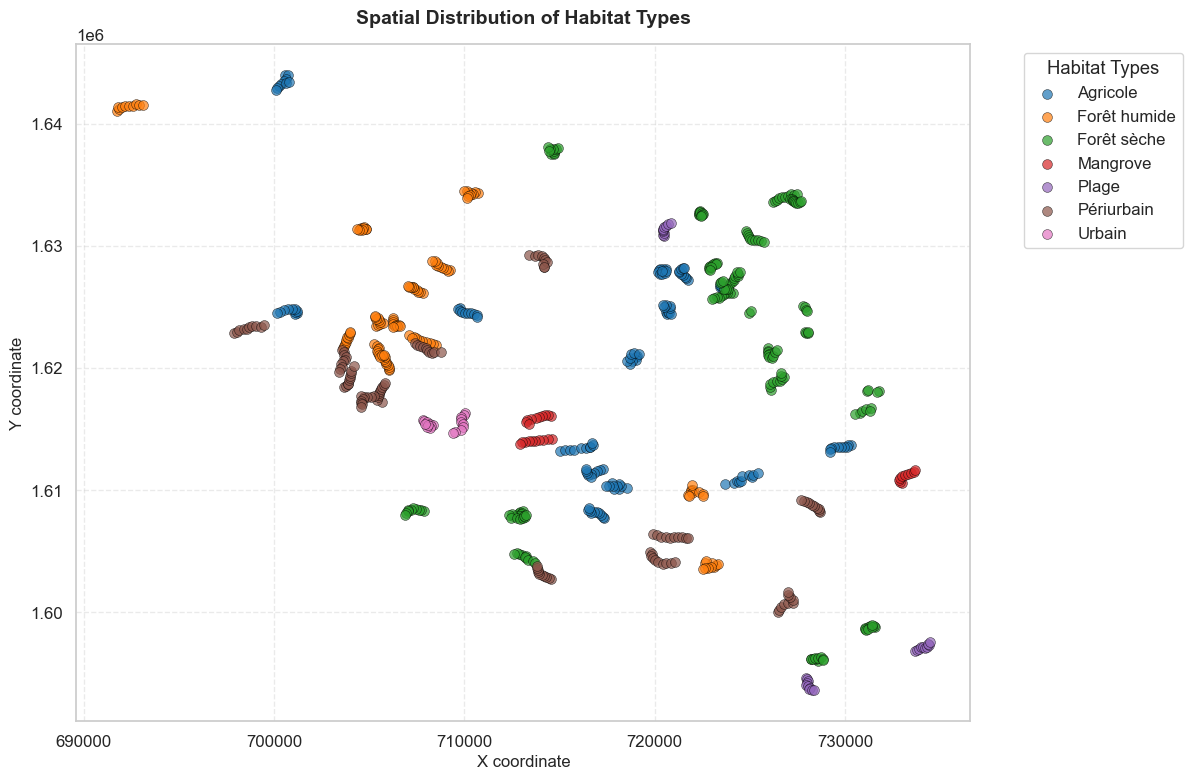

In [17]:
# Scatter plot of transect positions colored by habitat type
plt.figure(figsize=(10, 8))

# Unique habitat types
location_types = sorted(df_sites["Type"].unique())

# Use a colormap with enough contrast
cmap = mat.colormaps.get_cmap("tab10")

# Plot each habitat type
for i, t in enumerate(location_types):
    group = df_sites[df_sites["Type"] == t]
    plt.scatter(group["X"], group["Y"], label=t, color=cmap(i % 10), s=50, alpha=0.7, edgecolor="black", linewidth=0.4)

# Titles and labels
plt.title("Spatial Distribution of Habitat Types", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("X coordinate", fontsize=12)
plt.ylabel("Y coordinate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.legend(title="Habitat Types", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True)
plt.savefig("figures/habitat_types_positions.jpeg", bbox_inches="tight", dpi=300)
plt.show()

/opt/anaconda3/envs/applied-stats/lib/python3.12/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


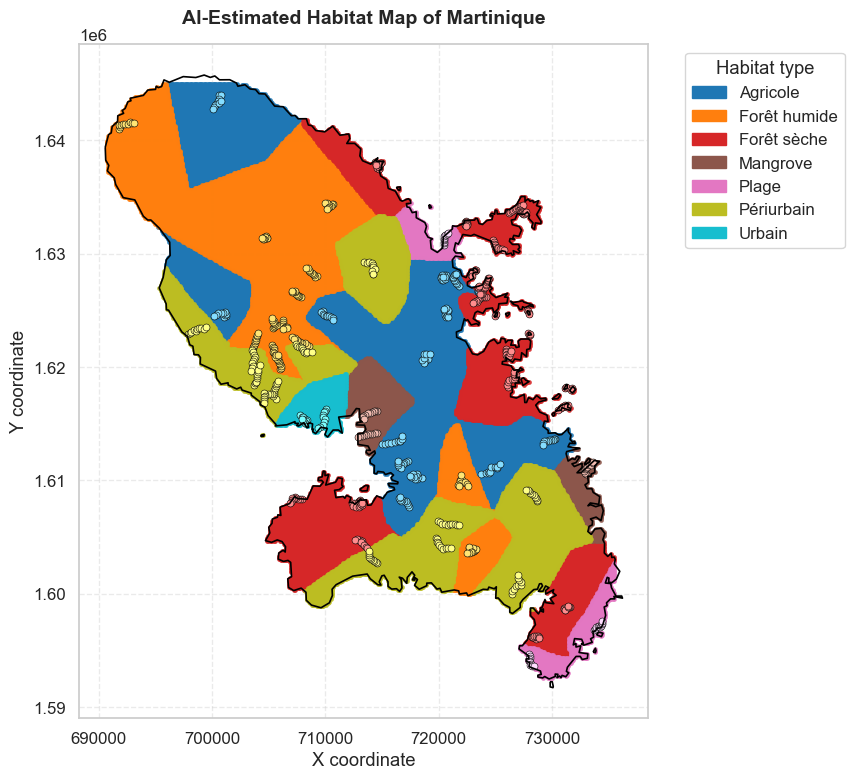

In [18]:
# Prepare coordinate data
df_sites["X"] = pd.to_numeric(df_sites["X"], errors="coerce")
df_sites["Y"] = pd.to_numeric(df_sites["Y"], errors="coerce")
df_sites = df_sites.dropna(subset=["X", "Y"])

# Load Martinique polygon
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_MTQ_0.json"
martinique = gpd.read_file(url).to_crs("EPSG:32620")

# Convert df_sites to GeoDataFrame
gdf_sites = gpd.GeoDataFrame(df_sites, geometry=gpd.points_from_xy(df_sites["X"], df_sites["Y"]), crs="EPSG:32620")

# Train KNN classifier
X = np.vstack((df_sites["X"], df_sites["Y"])).T
y = df_sites["Type"].to_numpy()
le = LabelEncoder()
y_encoded = le.fit_transform(y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y_encoded)

# Create a grid and keep only points inside Martinique
x_min, x_max = X[:, 0].min() - 1000, X[:, 0].max() + 1000
y_min, y_max = X[:, 1].min() - 1000, X[:, 1].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_gdf = gpd.GeoDataFrame(geometry=[Point(xy) for xy in grid_points], crs="EPSG:32620")
grid_in_island = grid_gdf[grid_gdf.within(martinique.geometry.iloc[0])]
coords = np.array([[p.x, p.y] for p in grid_in_island.geometry])

# Predict habitat for grid points
pred = knn.predict(coords)
grid_in_island["habitat"] = le.inverse_transform(pred)

# Plot map with matching colors + legend
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap("tab10", len(le.classes_))
colors = {cls: cmap(i) for i, cls in enumerate(le.classes_)}

# Plot island outline
martinique.boundary.plot(ax=ax, color="black", linewidth=1.2)

# Plot predicted habitat zones
for cls in le.classes_:
    sub = grid_in_island[grid_in_island["habitat"] == cls]
    sub.plot(ax=ax, color=colors[cls], markersize=6, alpha=0.8)

# Plot survey sites with lighter color shades
for cls in le.classes_:
    sub = gdf_sites[gdf_sites["Type"] == cls]
    if not sub.empty:
        r, g, b, _ = colors[cls]
        light_color = (min(r + 0.4, 1), min(g + 0.4, 1), min(b + 0.4, 1))
        sub.plot(ax=ax, color=light_color, markersize=25, edgecolor="black", linewidth=0.4)

# Create custom legend
patches = [mpatches.Patch(color=colors[cls], label=cls) for cls in le.classes_]
ax.legend(handles=patches, title="Habitat type", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True)

# Titles and labels
ax.set_title("AI-Estimated Habitat Map of Martinique", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("figures/habitat_types_map.jpeg", bbox_inches="tight", dpi=300)
plt.show()

In [19]:
def plot_distribution(ax, x, xlabel="", ylabel="", title=""):
    """
    Plots a clean histogram with percentage labels above bars

    ax : matplotlib.axes.Axes
        Axis to plot on
    x : pandas.Series or array-like
        Data to plot
    xlabel : str
        Label for the X-axis
    ylabel : str
        Label for the Y-axis
    title : str
        Title of the plot
    """
    cmap = plt.get_cmap("tab10")

    # Drop missing values
    x = x.dropna()

    # Compute counts per category (sorted by category)
    counts = x.value_counts().sort_index()
    total = counts.sum()

    # Create bars
    bars = ax.bar(counts.index.astype(str), counts.values, color=cmap(0), alpha=0.85, edgecolor="black", linewidth=0.7)

    # Add percentage labels
    for bar, value in zip(bars, counts.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + total * 0.01, f"{(100 * value / total):.1f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")

    # Formatting
    ax.set_xticklabels(counts.index, rotation=30, ha="right")
    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.4)
    sns.despine(ax=ax)

/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/2420565028.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha="right")
/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/2420565028.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha="right")
/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/2420565028.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha="right")
/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/2420565028.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

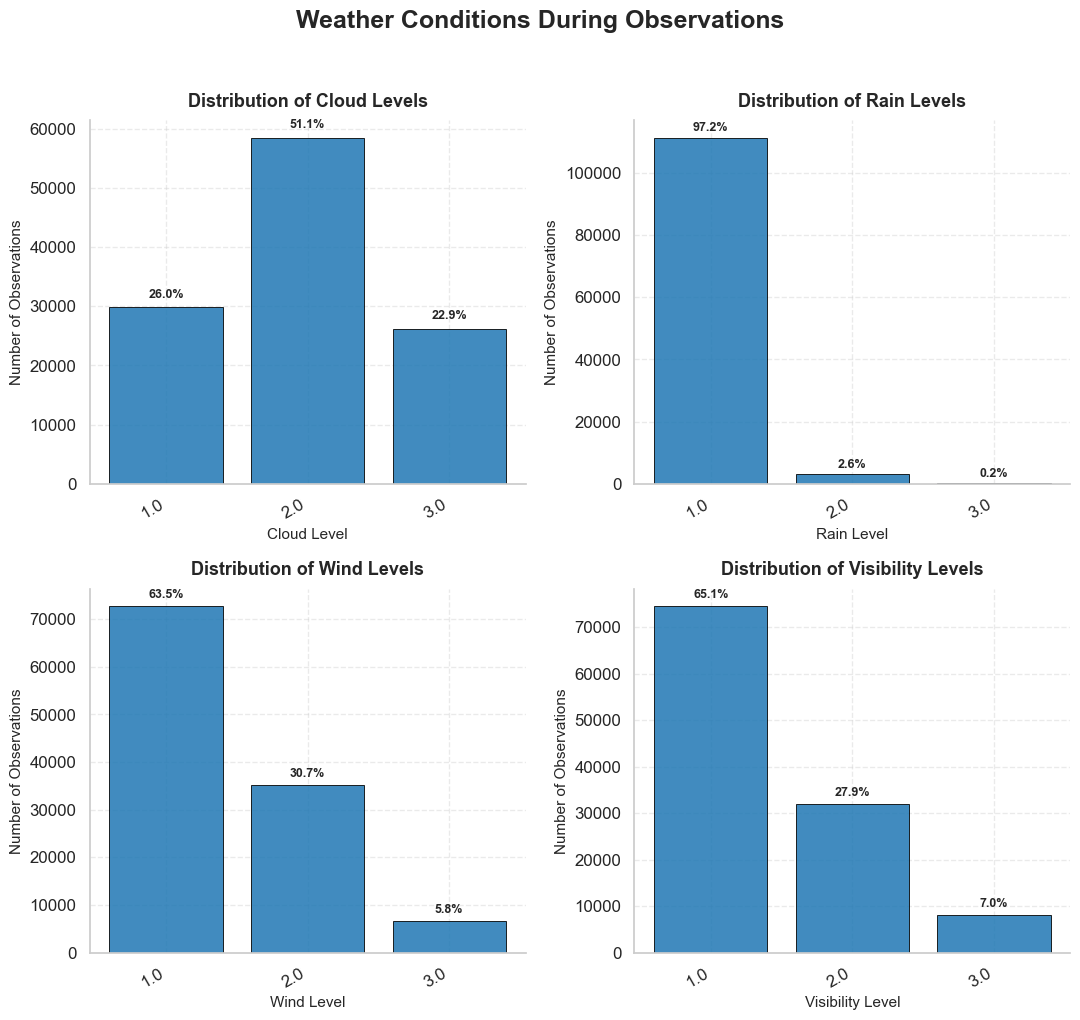

In [20]:
# Combined weather distributions (clouds, rain, wind, visibility)
fig, axes = plt.subplots(2, 2, figsize=(11, 10))
fig.suptitle("Weather Conditions During Observations", fontsize=18, fontweight="bold", y=1.02)

plot_distribution(axes[0, 0], df_observations["nuages"], "Cloud Level", "Number of Observations", "Distribution of Cloud Levels" )
plot_distribution(axes[0, 1],df_observations["pluie"], "Rain Level", "Number of Observations", "Distribution of Rain Levels" )
plot_distribution(axes[1, 0], df_observations["vent"], "Wind Level", "Number of Observations", "Distribution of Wind Levels" )
plot_distribution(axes[1, 1], df_observations["visibilité"], "Visibility Level", "Number of Observations", "Distribution of Visibility Levels" )

plt.tight_layout()
plt.savefig("figures/weather_conditions.jpeg")
plt.show()

In [21]:
# Analyzing transect visit frequency
visited = df_observations["Nom transect"].value_counts()
few_visites = visited[visited < 10]
print(f"There are {len(few_visites)} transects who have been visited less than 10 times")
print(few_visites)

There are 0 transects who have been visited less than 10 times
Series([], Name: count, dtype: int64)


The average number of species per site is 34.9 and the standard deviation is 5.7.


/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/565994202.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poorest.index, y=valsPoor, ax=axes[0], palette="Blues_r")
/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/565994202.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=richest.index, y=valsRich, ax=axes[1], palette="Greens")


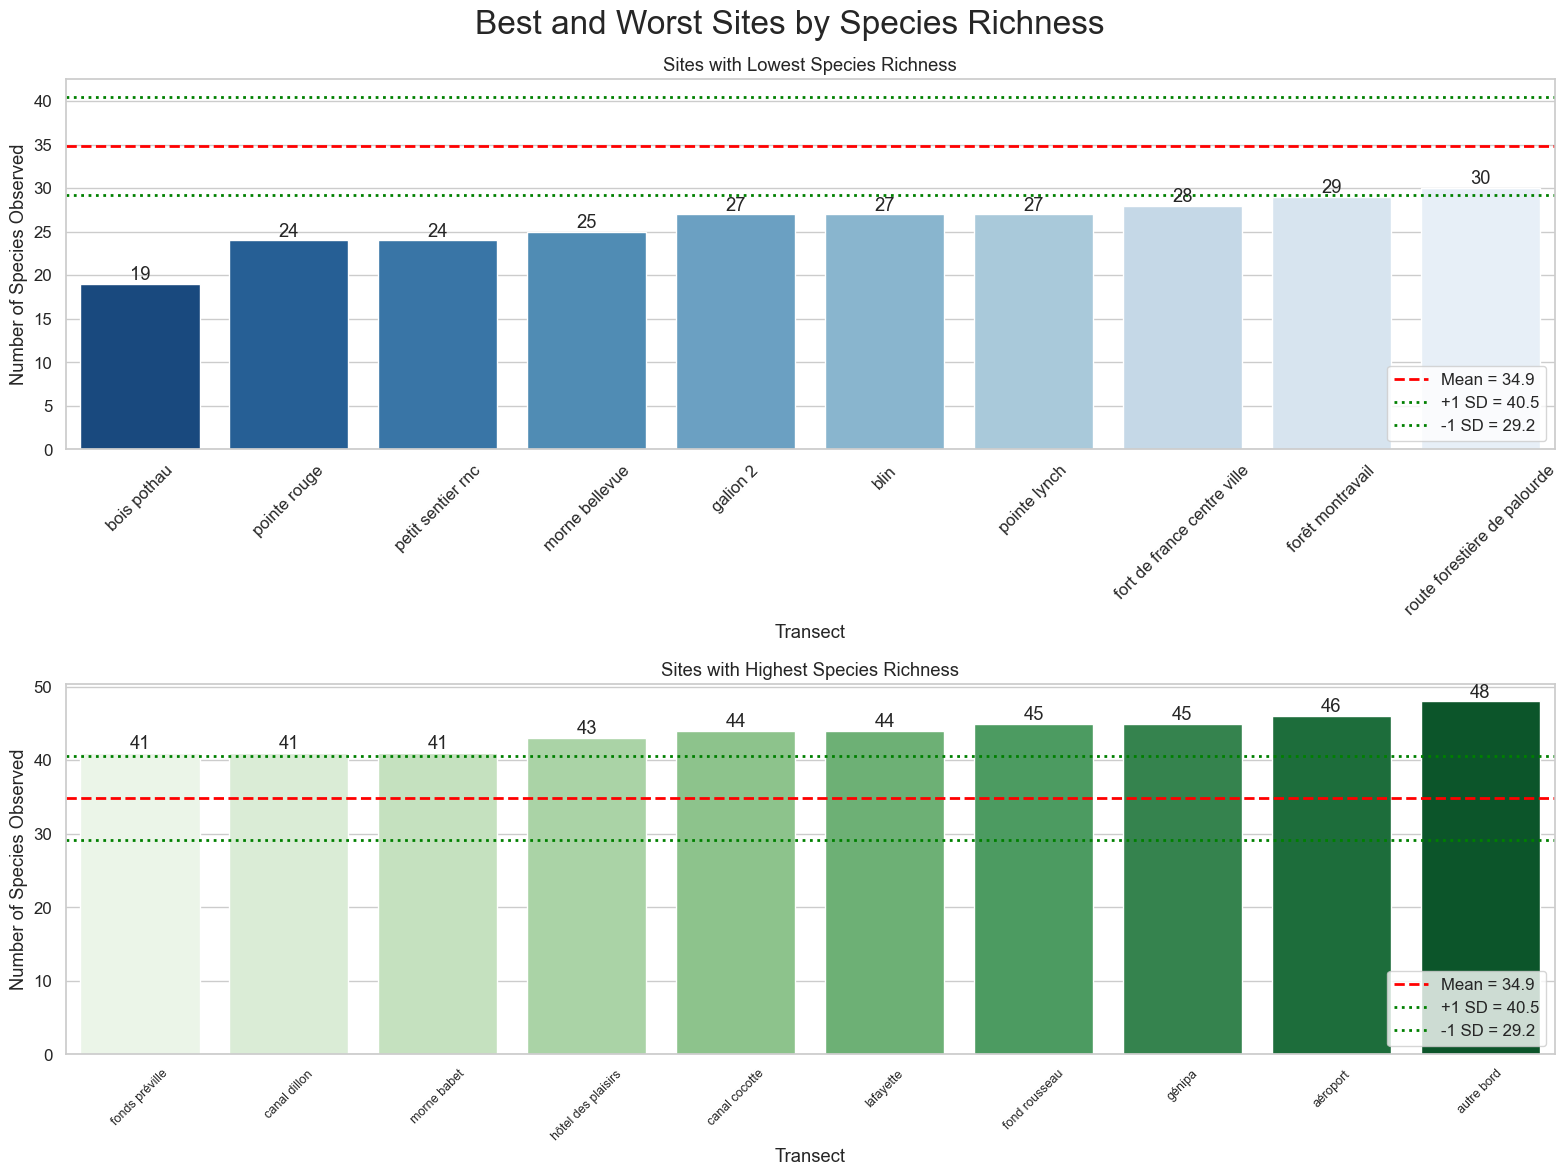

In [22]:
# Analyzing species richness per site
grouped = df_observations.groupby("Nom transect")["ESPECE"].nunique()
mean = grouped.mean()
std = grouped.std()
print(f"The average number of species per site is {mean:.1f} and the standard deviation is {std:.1f}.")

# Displaying best and worst sites by species richness
sorted = grouped.sort_values()
nSites = 10
poorest = sorted[:nSites]
richest = sorted[-nSites:]

fig, axes = plt.subplots(2, figsize=(16, 12))
fig.suptitle("Best and Worst Sites by Species Richness", fontsize=24)

valsPoor = np.array([val for key, val in poorest.items()])
valsRich = np.array([val for key, val in richest.items()])

# Plotting poorest sites
sns.barplot(x=poorest.index, y=valsPoor, ax=axes[0], palette="Blues_r")
axes[0].axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
axes[0].axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.1f}')
axes[0].axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.1f}')
axes[0].legend(loc="lower right", frameon=True)
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].tick_params(axis='x', labelsize=12, rotation=45)
axes[0].set_xlabel("Transect")
axes[0].set_ylabel("Number of Species Observed")
axes[0].set_title("Sites with Lowest Species Richness")

# Plotting richest sites
sns.barplot(x=richest.index, y=valsRich, ax=axes[1], palette="Greens")
axes[1].axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
axes[1].axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.1f}')
axes[1].axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.1f}')
axes[1].legend(loc="lower right", frameon=True)
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].tick_params(axis='x', labelsize=9, rotation=45)
axes[1].set_xlabel("Transect")
axes[1].set_ylabel("Number of Species Observed")
axes[1].set_title("Sites with Highest Species Richness")

plt.tight_layout()
plt.savefig("figures/species_richness_per_site.jpeg")
plt.show()

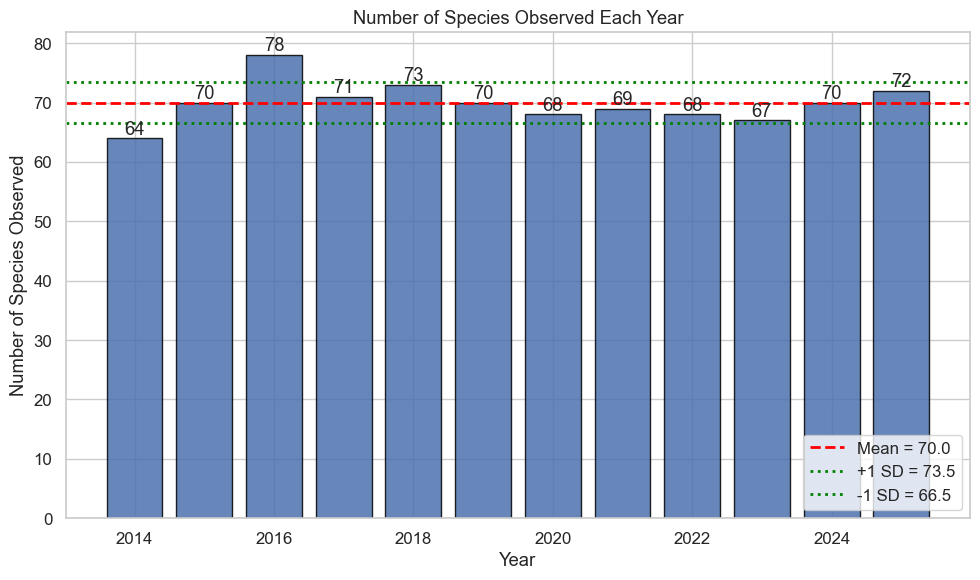

In [23]:
# Analyzing species observed per year
grouped_year = df_observations.groupby('year')['ESPECE'].nunique()

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_year.index, grouped_year.values, alpha=0.85, edgecolor="black")
plt.bar_label(bars)

mean = grouped_year.mean()
std = grouped_year.std()
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
plt.axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.1f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.1f}')

plt.xlabel("Year")
plt.ylabel("Number of Species Observed")
plt.title("Number of Species Observed Each Year")
plt.legend(loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("figures/species_richness_per_year.jpeg")
plt.show()

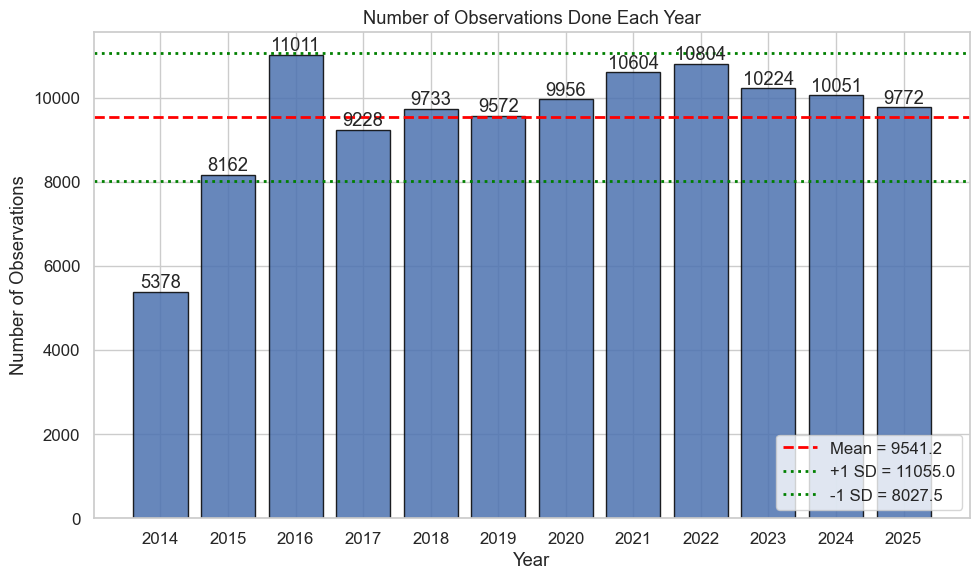

In [24]:
# Analyzing number of observations per year
observations_year = df_observations.groupby('year')['ESPECE'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(observations_year.keys().astype(str), observations_year.values, alpha=0.85, edgecolor="black")
plt.bar_label(bars)

mean = observations_year.mean()
std = observations_year.std()
plt.axhline(mean, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean:.1f}")
plt.axhline(mean + std, color="green", linestyle=":", linewidth=2, label=f"+1 SD = {mean + std:.1f}")
plt.axhline(mean - std, color="green", linestyle=":", linewidth=2, label=f"-1 SD = {mean - std:.1f}")

plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Number of Observations Done Each Year")
plt.legend(loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("figures/observations_per_year.jpeg")
plt.show()

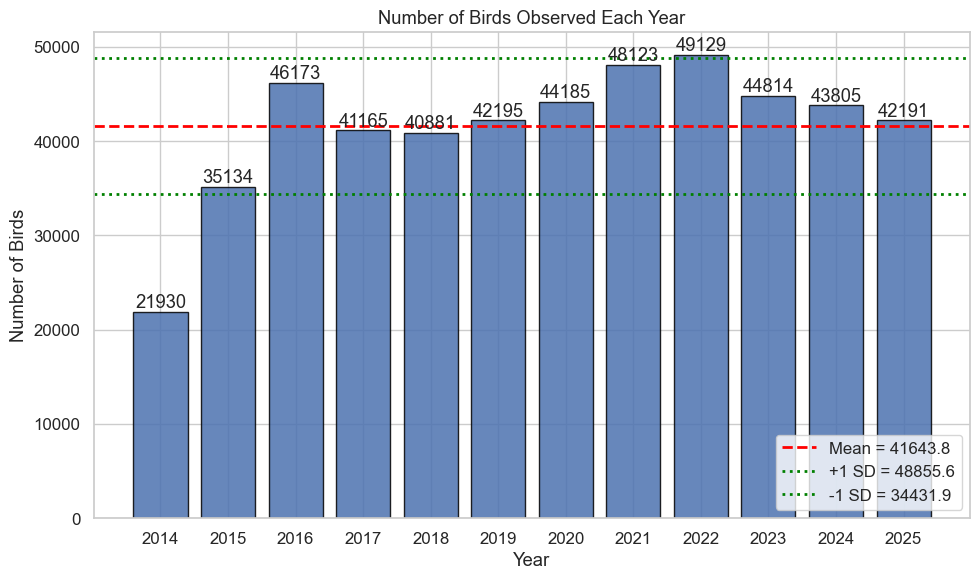

In [25]:
# Analyzing number of birds observed per year
amount_grouped = df_observations.groupby('year')["Amount"].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(amount_grouped.keys().astype(str), amount_grouped.values, alpha=0.85, edgecolor="black")
plt.bar_label(bars)

mean = amount_grouped.mean()
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')

std = amount_grouped.std()
plt.axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.1f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.1f}')

plt.xlabel("Year")
plt.ylabel("Number of Birds")
plt.title("Number of Birds Observed Each Year")
plt.legend(loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("figures/birds_per_year.jpeg")
plt.show()

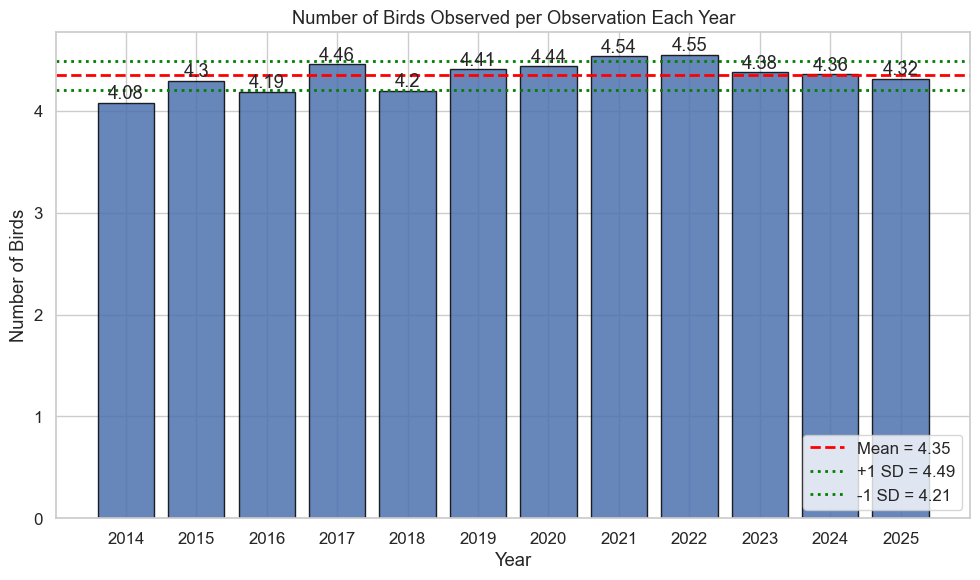

In [26]:
# Analyzing number of birds observed per observation per year
birds_per_observations = (amount_grouped / observations_year).astype(float)

plt.figure(figsize=(10, 6))
bars = plt.bar(birds_per_observations.keys().astype(str), birds_per_observations.round(2).values, alpha=0.85, edgecolor="black")
plt.bar_label(bars)

mean = birds_per_observations.mean()
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')

std = birds_per_observations.std()
plt.axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean+std:.2f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean-std:.2f}')

plt.xlabel("Year")
plt.ylabel("Number of Birds")
plt.title("Number of Birds Observed per Observation Each Year")
plt.legend(loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("figures/birds_per_observation_per_year.jpeg")
plt.show()

/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/4053879182.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_observed.index, y=least_observed.values, ax=axes[0], palette="Blues_r")
/var/folders/nl/6kthgqqn38ld9666g125hfrh0000gn/T/ipykernel_85728/4053879182.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_observed.index, y=most_observed.values, ax=axes[1], palette="Greens")


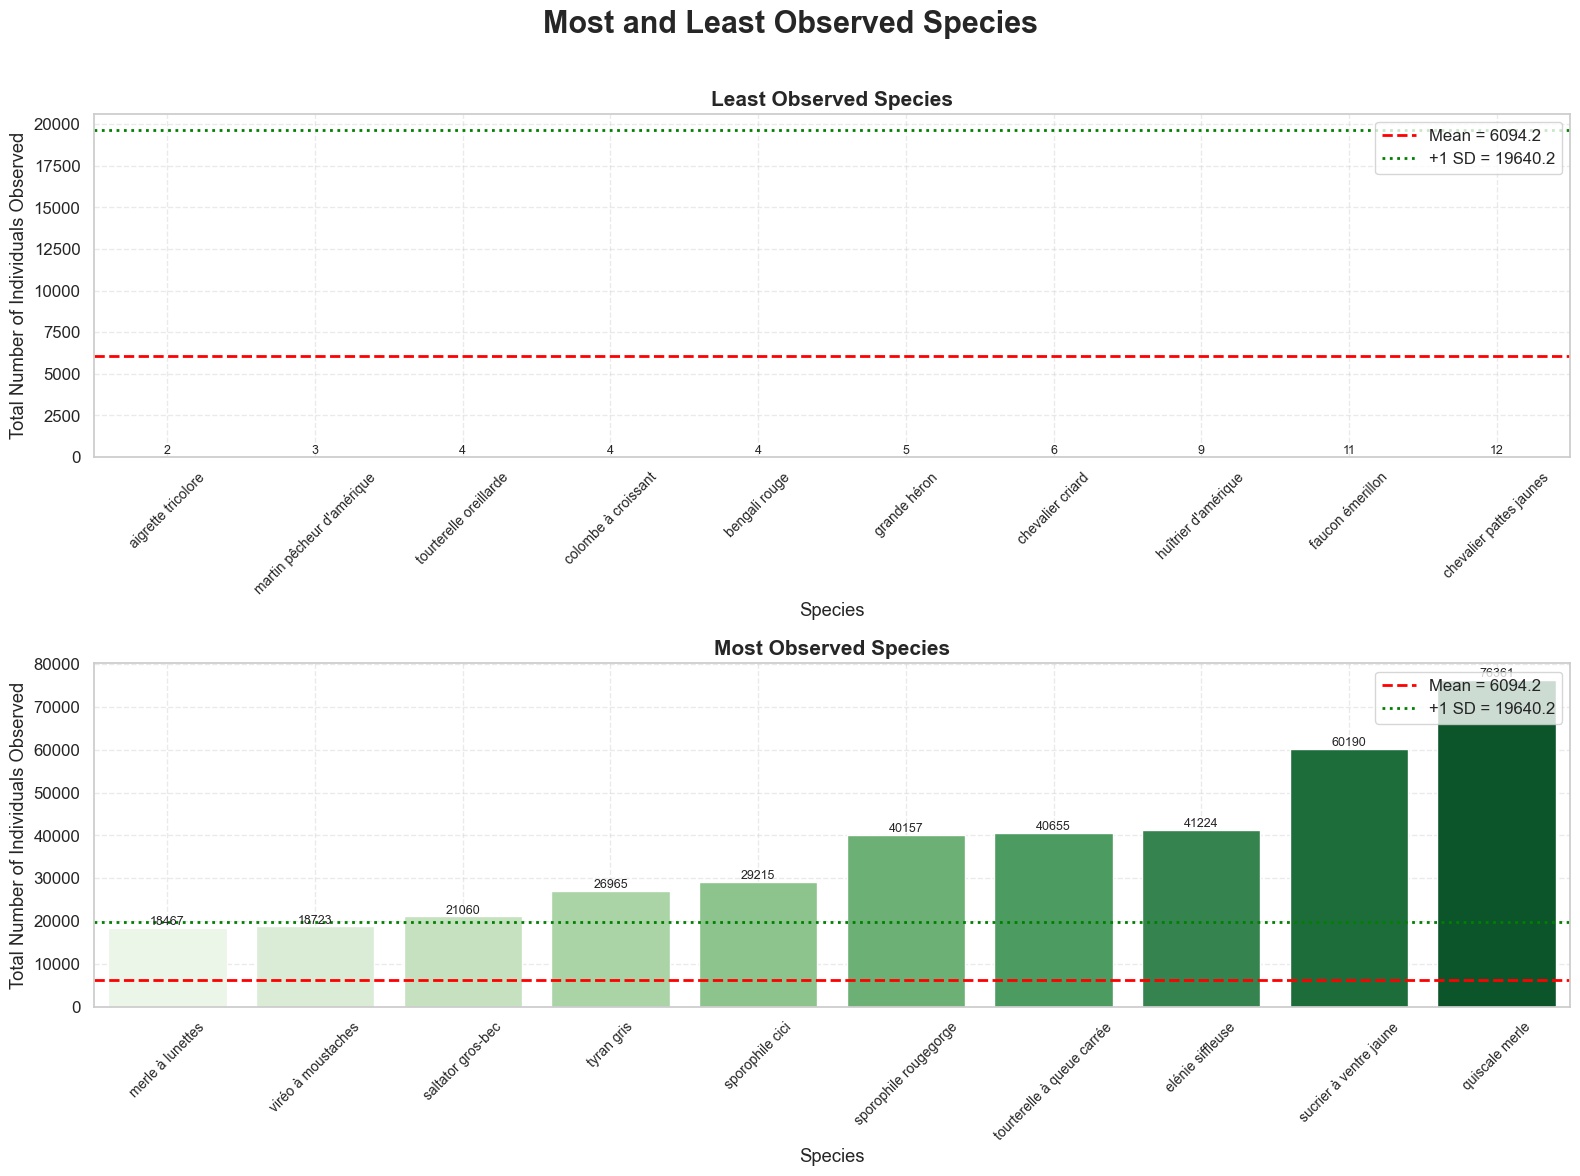

In [27]:
# Analyzing most and least observed species
df_observations2 = df_observations[df_observations["clean_espece"] != "ras"]
amount_per_specie = df_observations2.groupby("clean_espece")["Amount"].sum()

# Sort species by total amount observed
amount_sorted = amount_per_specie.sort_values()
least_observed = amount_sorted.head(10)
most_observed = amount_sorted.tail(10)

mean = amount_per_specie.mean()
std = amount_per_specie.std()

fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle("Most and Least Observed Species", fontsize=22, fontweight="bold")

# Plotting least observed species
sns.barplot(x=least_observed.index, y=least_observed.values, ax=axes[0], palette="Blues_r")
axes[0].axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
axes[0].axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean + std:.1f}')
# axes[0].axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean - std:.1f}')  # Negative
axes[0].legend(loc="upper right", frameon=True)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.0f", fontsize=9)
axes[0].set_title("Least Observed Species", fontsize=15, fontweight="bold")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Total Number of Individuals Observed")
axes[0].tick_params(axis='x', labelrotation=45, labelsize=10)
axes[0].grid(True, linestyle="--", alpha=0.4)

# Plotting most observed species
sns.barplot(x=most_observed.index, y=most_observed.values, ax=axes[1], palette="Greens")
axes[1].axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.1f}')
axes[1].axhline(mean + std, color='green', linestyle=':', linewidth=2, label=f'+1 SD = {mean + std:.1f}')
# axes[1].axhline(mean - std, color='green', linestyle=':', linewidth=2, label=f'-1 SD = {mean - std:.1f}')  # Negative
axes[1].legend(loc="upper right", frameon=True)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.0f", fontsize=9)
axes[1].set_title("Most Observed Species", fontsize=15, fontweight="bold")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Total Number of Individuals Observed")
axes[1].tick_params(axis='x', labelrotation=45, labelsize=10)
axes[1].grid(True, linestyle="--", alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("figures/most_and_least_observed_species.jpeg", bbox_inches="tight", dpi=300)
plt.show()

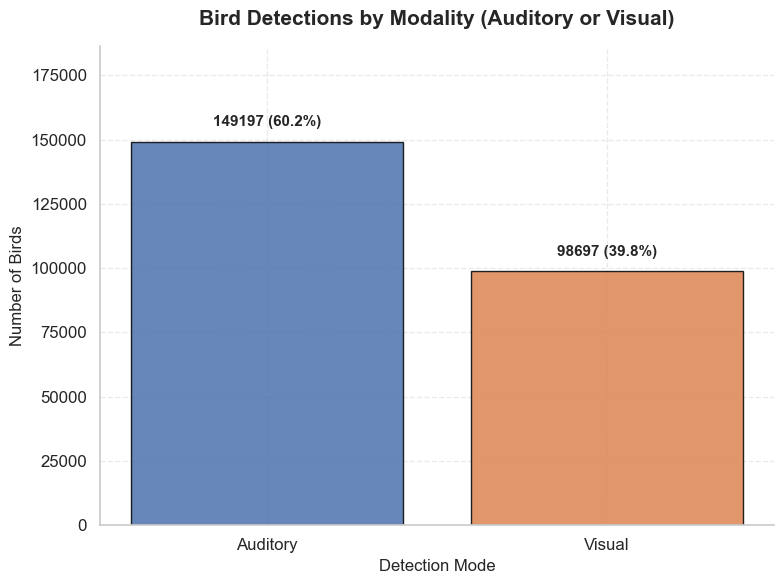

In [28]:
# Analyzing visual vs auditive detections
visual_amount = df_observations["Visuel"].sum()
auditif_amount = df_observations["Auditif"].sum()

# Prepare data
x = ["Auditory", "Visual"]
y = [auditif_amount, visual_amount]
total = sum(y)
percentages = [(val / total) * 100 for val in y]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(style="whitegrid")
colors = ["#4C72B0", "#DD8452"]
bars = ax.bar(x, y, color=colors, edgecolor="black", alpha=0.85)
for bar, val, pct in zip(bars, y, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.02, f"{int(val)} ({pct:.1f}%)", ha="center", va="bottom", fontsize=11, fontweight="bold")

ax.set_title("Bird Detections by Modality (Auditory or Visual)", fontsize=15, fontweight="bold", pad=15)
ax.set_xlabel("Detection Mode", fontsize=12)
ax.set_ylabel("Number of Birds", fontsize=12)
ax.set_ylim(0, max(y) * 1.25)
ax.grid(True, linestyle="--", alpha=0.4)
sns.despine(ax=ax)

# Save and show
plt.tight_layout()
plt.savefig("figures/auditory_vs_visual_detections.jpeg", bbox_inches="tight", dpi=300)
plt.show()

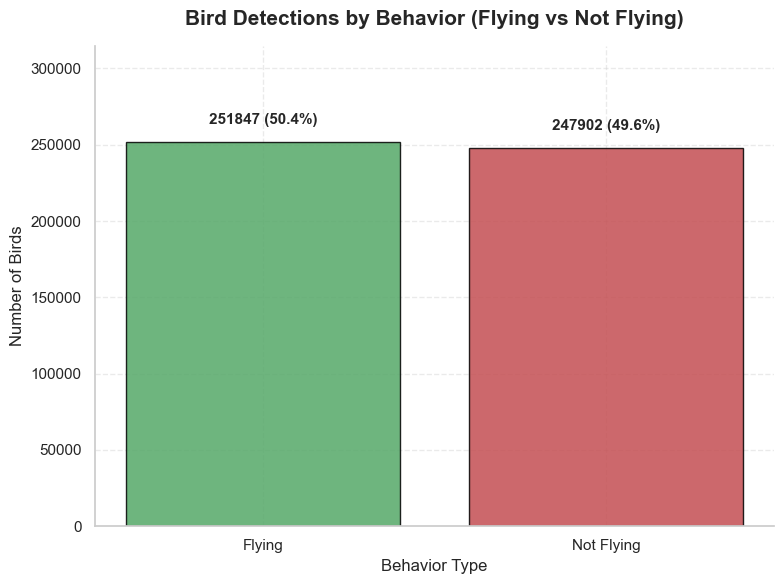

In [30]:
# Analyzing flying vs non-flying bird detections
detected_fly = df_observations["A+V Vol"].sum()
detected_no_fly = df_observations["A+V"].sum()

# Prepare data
x = ["Flying", "Not Flying"]
y = [detected_fly, detected_no_fly]
total = sum(y)
percentages = [(val / total) * 100 for val in y]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(style="whitegrid")
colors = ["#55A868", "#C44E52"]
bars = ax.bar(x, y, color=colors, edgecolor="black", alpha=0.85)
for bar, val, pct in zip(bars, y, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.02, f"{int(val)} ({pct:.1f}%)", ha="center", va="bottom", fontsize=11, fontweight="bold")

ax.set_title("Bird Detections by Behavior (Flying vs Not Flying)", fontsize=15, fontweight="bold", pad=15)
ax.set_xlabel("Behavior Type", fontsize=12)
ax.set_ylabel("Number of Birds", fontsize=12)
ax.set_ylim(0, max(y) * 1.25)
ax.grid(True, linestyle="--", alpha=0.4)
sns.despine(ax=ax)

# Save and show
plt.tight_layout()
plt.savefig("figures/fly_vs_no_fly_detections.jpeg", bbox_inches="tight", dpi=300)
plt.show()